In [1]:
def ew2py(fileName):
    """
        Reads EasyWave binary output into numpy arrays. 
        Works for .ssh and .sshmax files (at least).
        
        Example usage:

        lon, lat, h = ew2py(fileName)    
        plt.pcolormesh(lon,lat,h)
    """
    import struct
    from numpy import zeros, linspace

    f = open(fileName, 'rb')
    dsbb = f.read(4)

    nOutI = struct.unpack('h',f.read(2))[0]
    nOutJ = struct.unpack('h',f.read(2))[0]
    
    lonOutMin = struct.unpack('d',f.read(8))[0]
    lonOutMax = struct.unpack('d',f.read(8))[0]
    latOutMin = struct.unpack('d',f.read(8))[0]
    latOutMax = struct.unpack('d',f.read(8))[0]
    
    tmp = f.read(8)
    tmp = f.read(8)

    lon = linspace(lonOutMin,lonOutMax,nOutI)
    lat = linspace(latOutMin,latOutMax,nOutJ)
    values = zeros((nOutJ,nOutI))

    for j in range(nOutJ):
        for i in range(nOutI):
            value = f.read(4)
            value = struct.unpack('f',value)[0]
            values[j,i] = value
    return lon, lat, values

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Get time series for comparison

In [3]:
import pandas as pd
nami = pd.read_json('../tsunamilab/pois')

In [4]:
nami[21414]

closestDeepPoint                                                          []
depth                                                                   5325
location                                                   [178.219, 48.968]
pixel                                                           [1765, 2380]
shallowCorrectionFactor                                                    1
surface                    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
time                       [2.936551283095697, 5.873102566191394, 8.80965...
Name: 21414, dtype: object

In [5]:
ls ..\data\

 El volumen de la unidad D es LENOVO
 El n£mero de serie del volumen es: 2C65-F323

 Directorio de D:\github\tsunami-lab\Nami\validation\03_biobio2010\data

04-09-2018  04:00    <DIR>          .
04-09-2018  04:00    <DIR>          ..
04-09-2018  03:54    <DIR>          .ipynb_checkpoints
04-09-2018  02:29           261,978 bathymetry.ipynb
04-09-2018  02:28        89,600,016 bathymetry3min
04-09-2018  02:28       139,004,269 bathymetryEasywave.grd
19-07-2018  22:08           128,958 dart_32412
04-09-2018  03:09           377,576 dart_buoy.ipynb
04-09-2018  03:40           311,780 dart_buoys_download.ipynb
04-09-2018  04:00           637,708 dart_buoys_filter.ipynb
04-09-2018  03:37            86,110 dart21401
04-09-2018  03:37           112,094 dart21413
04-09-2018  03:36            86,110 dart21414
04-09-2018  03:37            93,790 dart21418
04-09-2018  03:36            86,110 dart21419
04-09-2018  03:37            86,110 dart32401
04-09-2018  03:37           149,214 dart32411
04-09

In [6]:
DARTs = [21414, 21419, 21401, 21418, 21413, 52403, 52406, 55012, 51425, 51407,
        46404, 46407, 46411, 46412, 43412, 43413, 32411, 32412,32413,32401]
skipBuoys = [32401, 32413, 43413, 52406, 21401, 21419, 21414]

DARTs = [dart for dart in DARTs if dart not in skipBuoys]

In [7]:
darts = {}

for dart in DARTs:
#     print(dart)
    darts[dart] = np.loadtxt('../data/tsunamiDART{}'.format(dart))

In [8]:
ranges = {
    21418: 0,
    21413: 1200,
    52403: 1300,
    55012: 1000,
    51425: 800,
    51407: 800,
    46404: 900,
    46407: 800,
    46411: 800,
    46412: 700,
    43412: 550,
    32411: 1100,
    32412: 120,
}

In [9]:
ewave = pd.read_csv('../easywave/eWave.poi.ssh', delim_whitespace=True)
ewave.head()

,Minute,21414,21419,21401,21418,21413,52403,52406,55012,51425,...,46404,46407,46411,46412,43412,43413,32411,32412,32413,32401
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
ewave.columns

Index(['Minute', '21414', '21419', '21401', '21418', '21413', '52403', '52406',
       '55012', '51425', '51407', '46404', '46407', '46411', '46412', '43412',
       '43413', '32411', '32412', '32413', '32401'],
      dtype='object')

32412


c:\users\jose\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


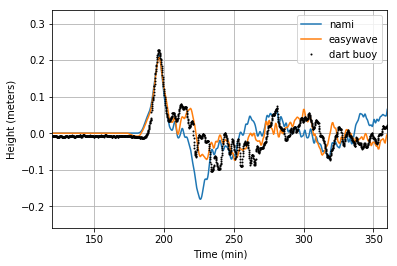

43412


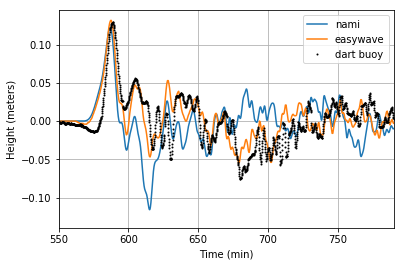

46412


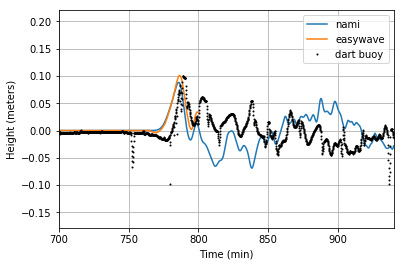

46407


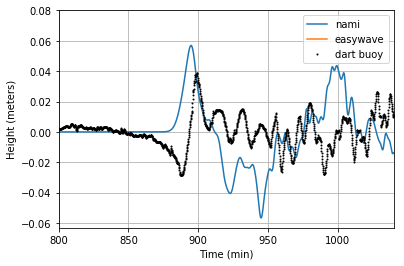

46404


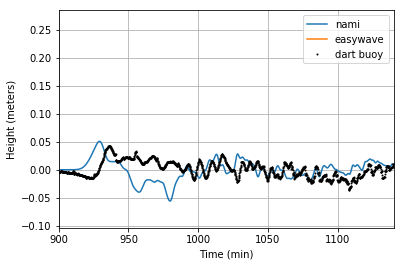

51425


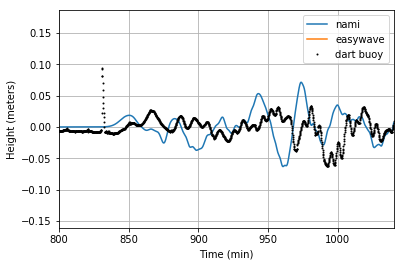

55012


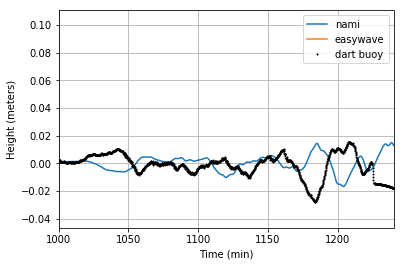

52403


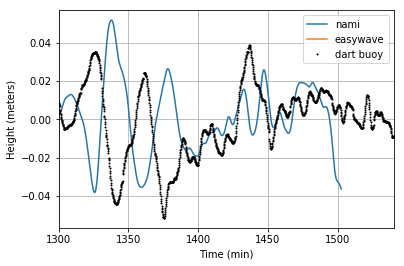

21413


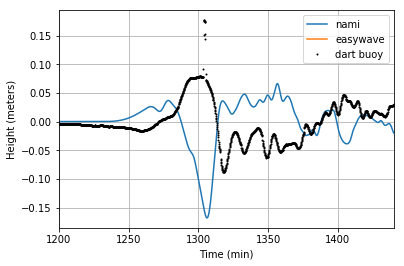

In [11]:
dart_number = 32412

for dart_number in [32412,
                    43412,
                    46412,
                    46407,
                    46404,
                    51425,
                    55012,
                    52403,
                    21413]:
    print(dart_number)
    plt.plot(np.array(nami[dart_number].time)/60, nami[dart_number].surface,label='nami')
    plt.plot(ewave['Minute'], ewave[str(dart_number)],label='easywave')
    plt.plot(darts[dart_number][:,0]*60*24, darts[dart_number][:,1],'.', label='dart buoy', ms=2, c='k')

    plt.legend(loc=0)
#     plt.xlim(2.5*60,6*60)
    plt.xlim(ranges[dart_number], ranges[dart_number]+4*60)
    # plt.xlim(175,200)
    plt.xlabel('Time (min)')
    plt.ylabel('Height (meters)')
    plt.grid('on')
    plt.show()
